# Individual Project Proposal
### By: Christine Wu

#### Setting Up Libraries and Parameters

In [1]:
#Run this first.
library(tidyverse)
library(repr)
library(RColorBrewer)
library(tidymodels)
options(repr.matrix.max.rows = 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57


# Part 1: Data Description 

The **players.csv** dataset contains players' demographic and behavioural information, including name, gender, age, experience level, subscription status, and total hours played per player. There are 196 observations and 7 variables, with each player occupying a unique row. The data was collected from a Minecraft research server managed by a UBC Computer Science group led by Frank Wood, who records player interactions and engagement patterns.

#### Variable Summary
- `experience` *(character)*: level of player experience (e.g., Amateur, Regular, Pro, Veteran)
- `hashedEmail` *(character)*: each player's encrypted unique identifier
- `name` *(character)*: player's username
- `gender` *(character)*: self-identified gender of the player
- `played_hours` *(double)*: total number of hours the player spent in the game
- `Age` *(double)*: age of the player in years
- `subscribe` *(logical)*: whether the player subscribed to the newsletter of the game

#### Summary of the Dataset 

In [3]:
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

# Part 2: Questions

##### **Question:**
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
##### **Specific Question:**
Can demographic and gameplay-related features like `Age`, `gender`, `experience`, and `played_hours` predict whether a player will `subscribe` to the Mincraft research server newsletter?

##### Specific Question Explanation: 
The `players.csv` dataset includes the response variable `subscribe` and explanatory variables that describe each player's characteristics and gameplay activity. After handling missing values, log-transforming skewed data, and encoding categorical variables as numerical values, logistic regression can be applied to determine which characteristics (`Age`, `gender`, `experience`, and `played_hours`) most strongly predict subscription.

# Part 3: Exploratory Data Analysis and Visualization

In [9]:
#loading the players.csv dataset
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57


The data complies with the following tidy data rules:
- Each variable forms is its own column
- Each observation is its own row
- Each cell contains a singular value 

In [4]:
#Computing the mean of all quantitative variables in players.csv dataset
players_mean <- players |>
    summarize(
        mean_played_hours = mean(played_hours, na.rm = TRUE),
        mean_age = mean(Age, na.rm = TRUE)
        )
players_mean

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


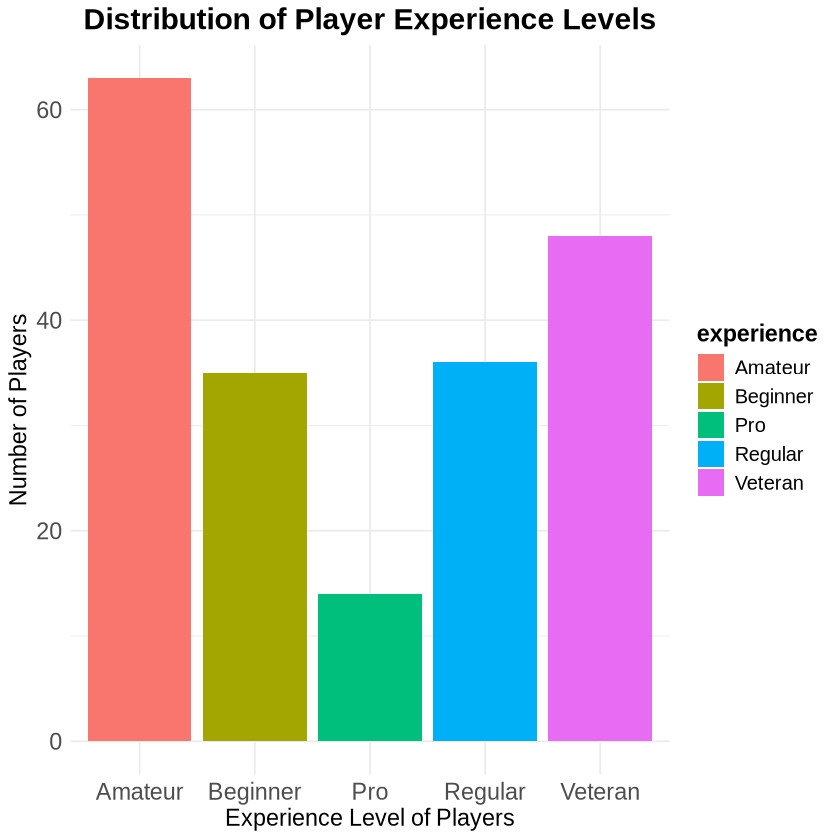

In [28]:
#Barplot of the distribution of player experience
players_plot <- ggplot(players, aes(x = experience, fill = experience)) +
    geom_bar() +
    labs(
        title = "Distribution of Player Experience Levels",
        x = "Experience Level of Players",
        y = "Number of Players"
        ) +
    theme_minimal() +
    theme(
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.text = element_text(size = 14),
        legend.title = element_text(size = 14, face = "bold"),
        legend.text = element_text(size = 12)
        )

             
players_plot

**Insight**: Most players are Amateur, followed by a smaller group of Veteran players. This suggests that most players are new to the game.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


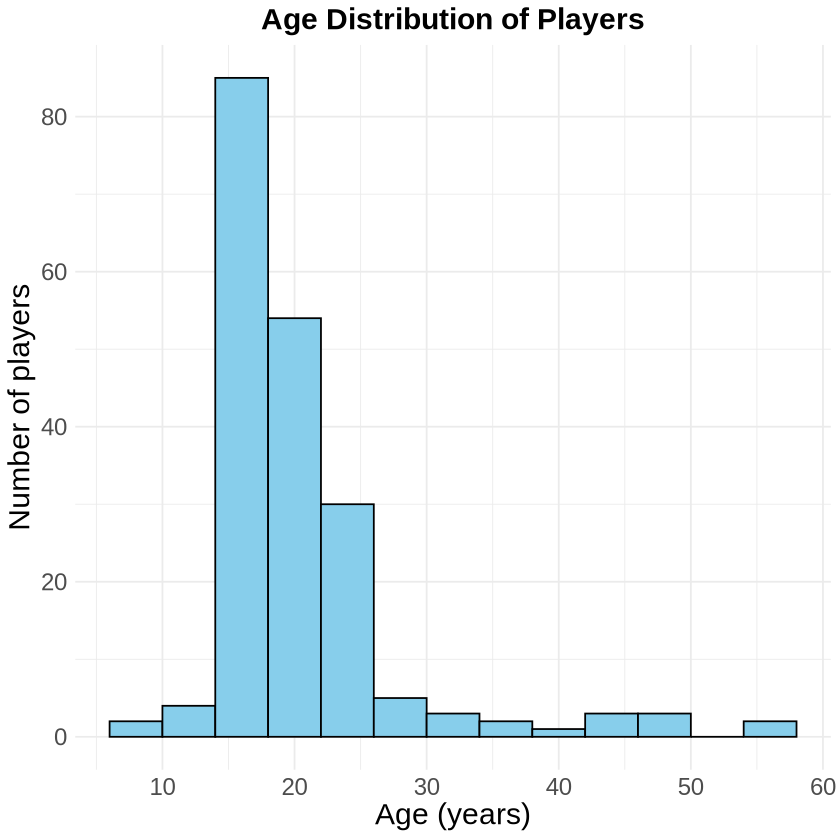

In [15]:
#Histogram of Age Distribution
age_plot <- ggplot(players, aes(x = Age)) +
    geom_histogram(binwidth = 4, fill = "skyblue", color = "black") +
    labs(
        title = "Age Distribution of Players",
        x = "Age (years)",
        y = "Number of players"
        ) +
    theme_minimal() +
    theme(text = element_text(size = 18),
         plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
          )
age_plot

**Insight**: Age distribution is right-skewed, with most players between 15 and 25 years old.

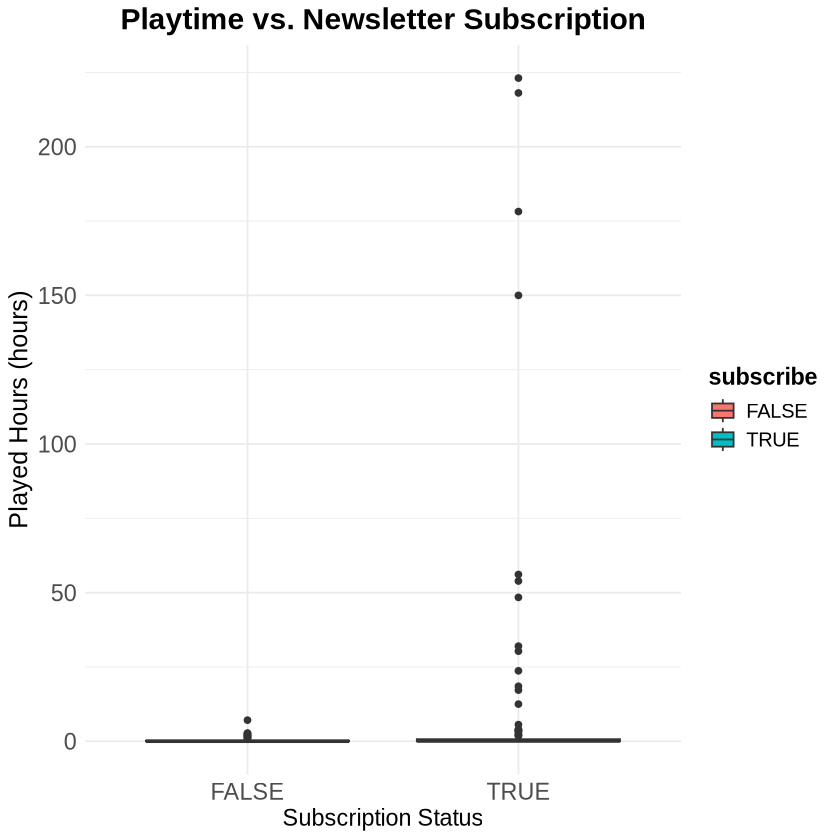

In [31]:
#Boxplot of Playtime and Subscription Status
playtime_plot <- ggplot(players, aes(x = subscribe, y = played_hours, fill = subscribe)) +
    geom_boxplot() +
    labs(
        title = "Playtime vs. Newsletter Subscription",
        x = "Subscription Status",
        y = "Played Hours (hours)"
        ) +
    theme_minimal() +
    theme(
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 15),
        axis.text = element_text(size = 14),
        legend.title = element_text(size = 14, face = "bold"),
        legend.text = element_text(size = 12)
        )
playtime_plot


**Insight**: Subscribed players have a higher median playtime, suggesting a possible relationship between engagement level and the likelihood of subscribing.

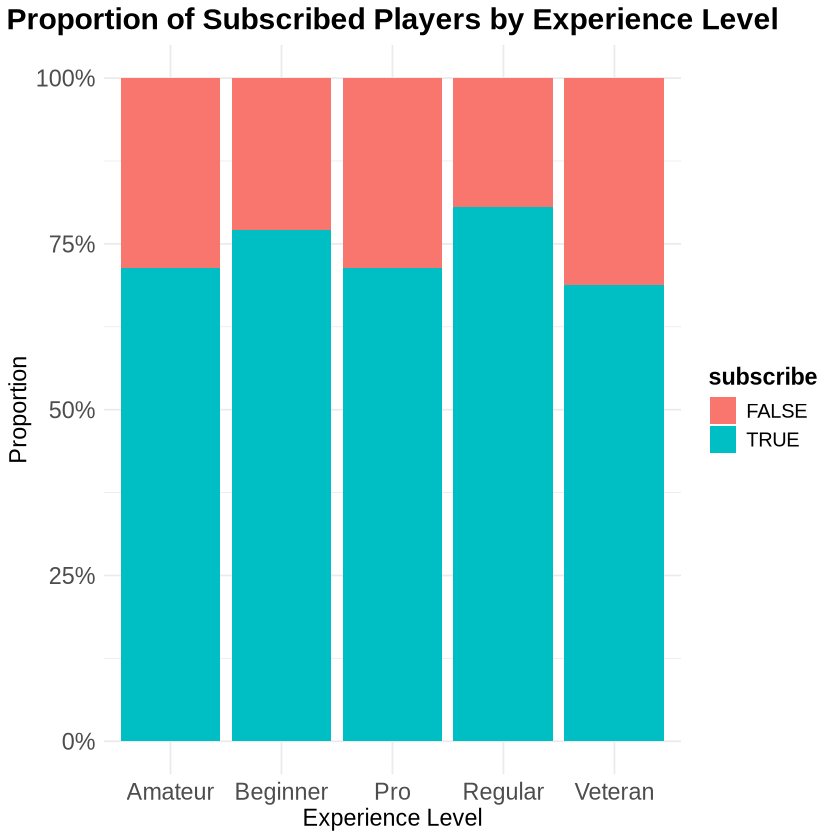

In [32]:
#Bar plot of Experience levels of the players who subscribed
subscribed_experience_plot <- ggplot(players, aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(
        title = "Proportion of Subscribed Players by Experience Level",
        x = "Experience Level",
        y = "Proportion"
        ) +
    scale_y_continuous(labels = scales::percent) +
    theme_minimal() +
   theme(
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        axis.text = element_text(size = 14),
        legend.title = element_text(size = 14, face = "bold"),
        legend.text = element_text(size = 12)
        )
subscribed_experience_plot

**Insight**: Players across all experience levels are subscribed, with proportions ranging between 70% and 85%. 

# Part 4: Methods and Plan

#### The Method and Why it is Appropriate
To address the research question, a **logistic regression model** will be used to conduct this experiment. This method is appropriate because it is most suitable for modelling a **binary response variable** such as `subscribe`, where there are only two possible outcomes (true/false). Multiple explanatory variables like `Age`, `gender`, `experience`, and `played_hours` can also be used for this model, which is beneficial to identify which variables most strongly influence the likelihood of subscription.

#### Assumptions
Assumptions ensure that the logistic regression model's predictions and variable interpretations are unbiased and reliable.
To apply the logistic regression model, assumptions include:
- **Independence of observations:** Each player is an independent data point, and a player's subscription status does not influence another player's.
- **Linearity in the logit:** The relationship between each numeric predictor and the log-odds of the response variable should be approximately linear.
- **No multicollinearity:** Explanatory variables should not be highly correlated with each other. 
- **Large sample size:** The sample size should be sufficiently large to avoid overfitting. 

#### Potential Limitations and Weaknesses 
A limitation of the logistic regression model is that it assumes a linear relationship between predictors and the log-odds. This means that some nonlinear associations that do exist may not be accounted for, and player behaviours may be overly simplified. In addition, logistic regression is designed for binary classification and is not applicable to continuous response variables. It is also sensitive to outliers as extreme values in `played_hours` may change coefficient estimates and reduce overall model stability/effectiveness.

#### Compare and Select
The model selected will be based on both predictive accuracy and interpretability. Metrics, including overall accuracy, precision, and the area under the ROC curve, will determine how well the model predicts whether a player is a subscriber. A 5-fold cross-validation will be applied to the training set to tune model parameters and prevent overfitting, thus improving generalizability. 

#### Data Processing Plan
The dataset will first be cleaned by removing missing `Age` values, log-transforming `played_hours` to reduce skewness, and encoding the categorical variables (`experience` and `gender`) as numerical dummy variables. The data will then be stratified by `subscribe` and split into training (70%) and testing (30%) sets. Within the training data, 5-fold cross-validation will be applied to tune the model and assess generalization before testing the final predictive performance.

# Part 5: GitHub Repository

Link: https://github.com/christineewuu/Individual-Project.git